# Quantitative Analysis of Stock Data
This notebook performs quantitative analysis on selected technology stocks. It demonstrates how to load stock data, compute technical indicators, and visualize results for multiple tickers.

---

### Setup and Warning Suppression
Add the parent directory to the Python path so that scripts in the parent folder can be imported. Also, suppress a specific matplotlib warning for cleaner output.

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import warnings
warnings.filterwarnings("ignore", message=".*Creating legend with loc=\"best\" can be slow.*")

### Import Required Modules
Import all specialized functions for financial data analysis and visualization:

In [2]:
from scripts.load_data import load_stock_data
from scripts.indicators.moving_averages import add_moving_averages
from scripts.indicators.rsi import add_rsi
from scripts.indicators.macd import add_macd
from scripts.indicators.plot_stock_indicators import plot_price_with_indicators, plot_rsi, plot_macd
from scripts.yfinance_metrics import get_returns, get_rolling_volatility
import matplotlib.pyplot as plt

### Stock Analysis Function Overview

The `analyze_stock(ticker)` function performs the full analysis pipeline for a given stock symbol:

1. **Data Loading**  
   - Loads historical stock data from a local CSV file using `load_stock_data`.

2. **Technical Indicators**  
   - Computes key indicators:
     - Simple Moving Averages (SMA20, SMA50)
     - Relative Strength Index (RSI)
     - Moving Average Convergence Divergence (MACD)

3. **Visualizations**  
   - Plots:
     - Price chart with moving averages
     - RSI line chart with threshold bands (30, 70)
     - MACD with signal line and histogram
     - 20-day rolling volatility

4. **Returns Summary**  
   - Prints the first few rows of the stock’s daily returns.

5. **Error Handling**  
   - Gracefully handles and logs issues (e.g., missing data or formatting problems).


In [3]:
def analyze_stock(ticker):
    try:
        stock_df = load_stock_data(ticker)
        stock_df = add_moving_averages(stock_df)
        stock_df = add_rsi(stock_df)
        stock_df = add_macd(stock_df)

        plot_price_with_indicators(stock_df, title=f"{ticker} Price with MA and Indicators")
        plot_rsi(stock_df, rsi_column='RSI', title=f"{ticker} RSI")
        plot_macd(stock_df, macd_col='MACD', signal_col='MACD_signal', hist_col='MACD_hist', title=f"{ticker} MACD")

        returns_df = get_returns(ticker)
        print(f"{ticker} Returns Sample:")
        print(returns_df.head())

        vol_df = get_rolling_volatility(ticker)
        vol_df.plot(x='date', y='volatility', title=f"{ticker} 20-Day Rolling Volatility", figsize=(12, 4))
        plt.show()

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

### Main Analysis
For each ticker, load data, compute indicators, plot results, and display returns and volatility.

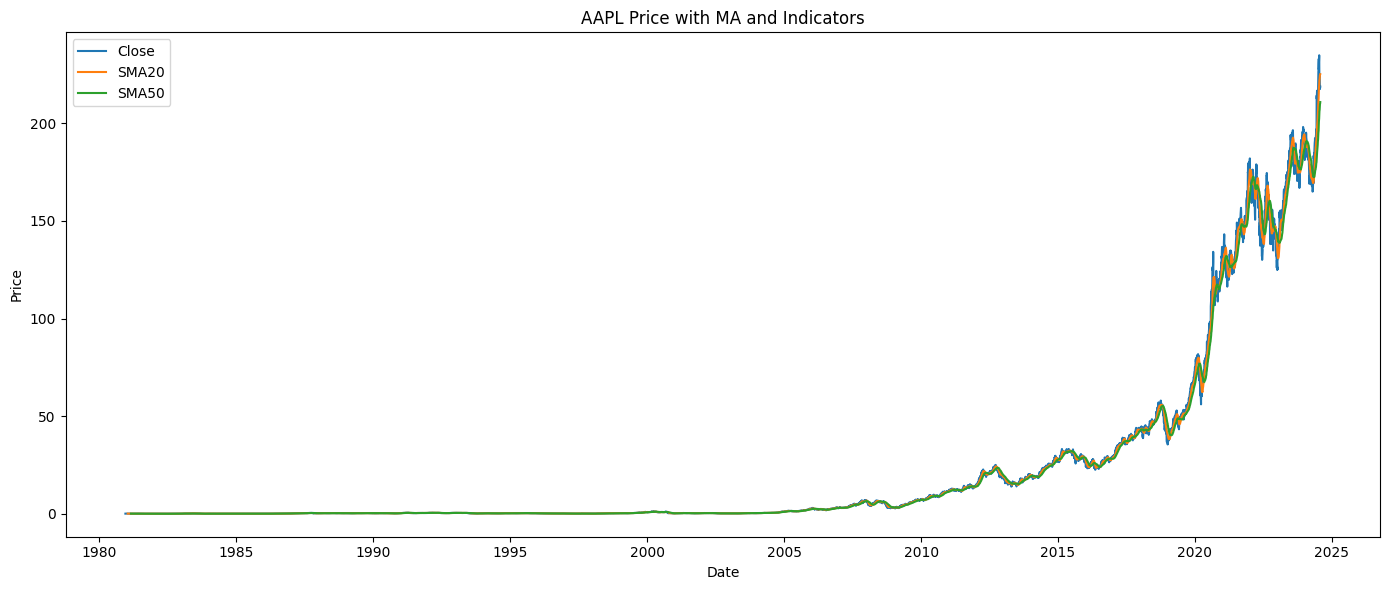

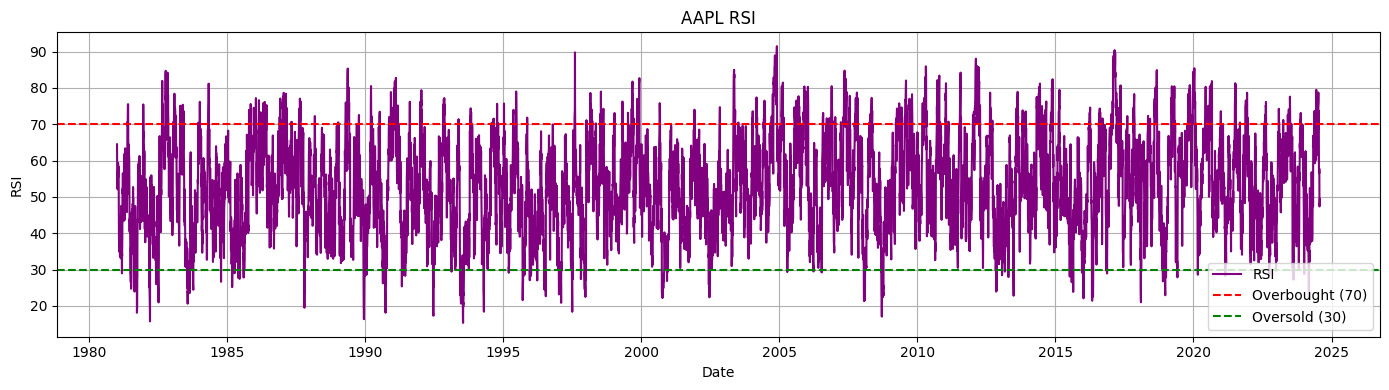

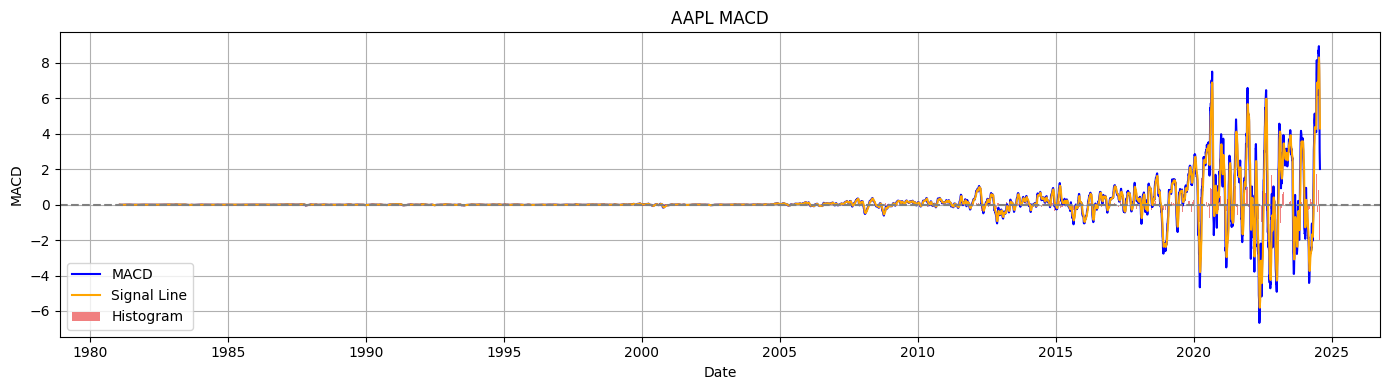

AAPL Returns Sample:
        date   returns
0 2023-01-04  0.010314
1 2023-01-05 -0.010605
2 2023-01-06  0.036794
3 2023-01-09  0.004089
4 2023-01-10  0.004456


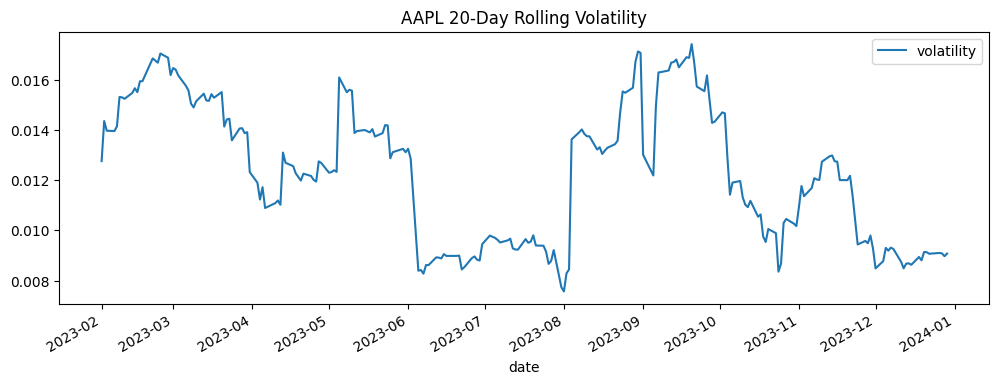

In [4]:
analyze_stock("AAPL")

## AAPL Quantitative Analysis

### 20-Day Rolling Volatility
- Volatility fluctuated between ~0.008 and 0.016 from 2023-02 to 2024-01.
- Peaks in mid- and late-2023 indicate higher price fluctuation.
- Recent trend shows decreased volatility toward 2024-01.

### MACD
- Spans 1980 to 2025, with recent (2020-2025) increased volatility.
- Multiple crossovers suggest potential buy/sell signals.
- Histogram spikes indicate stronger momentum shifts recently.

### Price with MA Indicators
- Steady upward trend from 2010 to 2025.
- Price generally above SMA20 and SMA50, with occasional dips below SMA20.
- Suggests a strong bullish trend with short-term pullbacks.

### RSI
- Fluctuates between 20 and 80, with overbought (>70) and oversold (<30) levels.
- Recent data (2020-2025) shows frequent overbought conditions.
- May indicate potential reversals or corrections.

### Returns Sample
- Data from 2023-01-04 to 2023-01-10.
- High: 0.036794 (3.68%) on 2023-01-06; Low: -0.010605 (-1.06%) on 2023-01-05.
- Supports observed price fluctuations and volatility.

### Summary
- Strong upward price trend with high volatility and overbought RSI levels.
- Caution advised for potential short-term corrections.
- MACD shows active momentum shifts aligning with returns data.

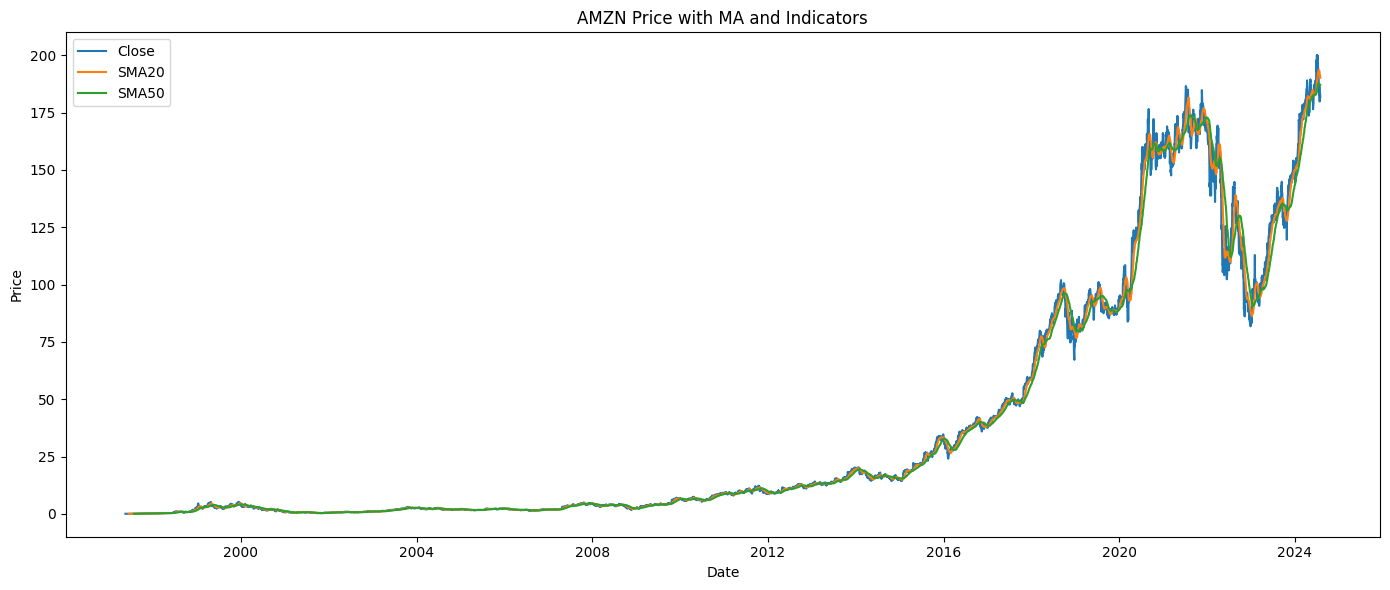

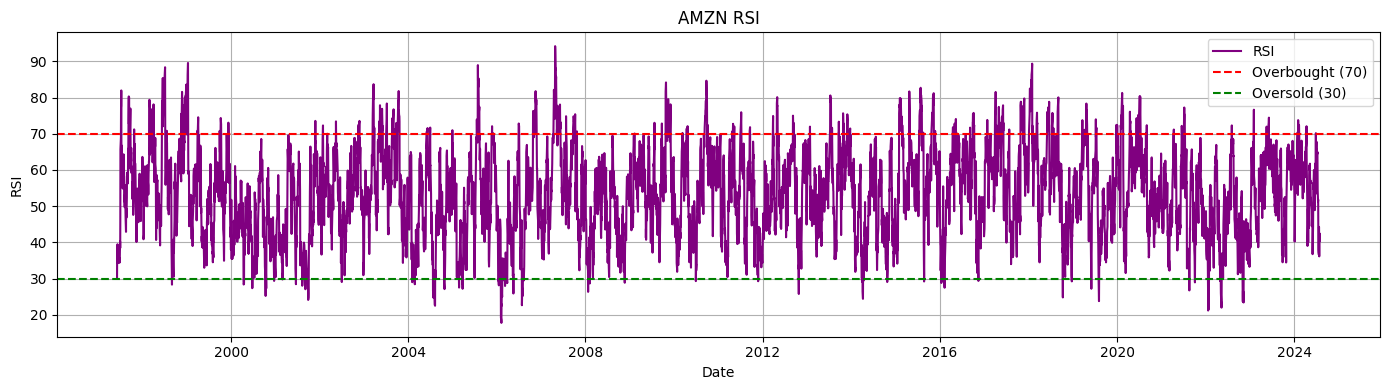

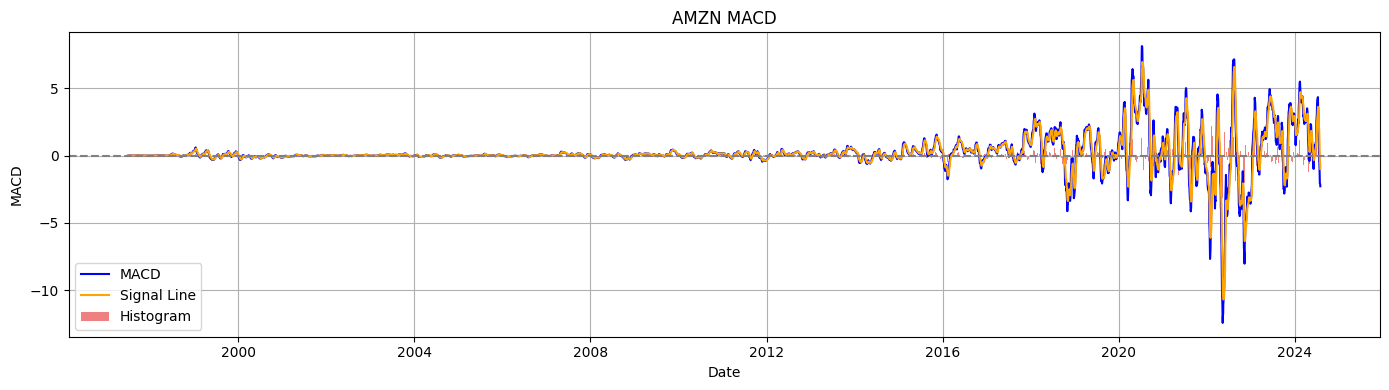

AMZN Returns Sample:
        date   returns
0 2023-01-04 -0.007924
1 2023-01-05 -0.023726
2 2023-01-06  0.035611
3 2023-01-09  0.014870
4 2023-01-10  0.028732


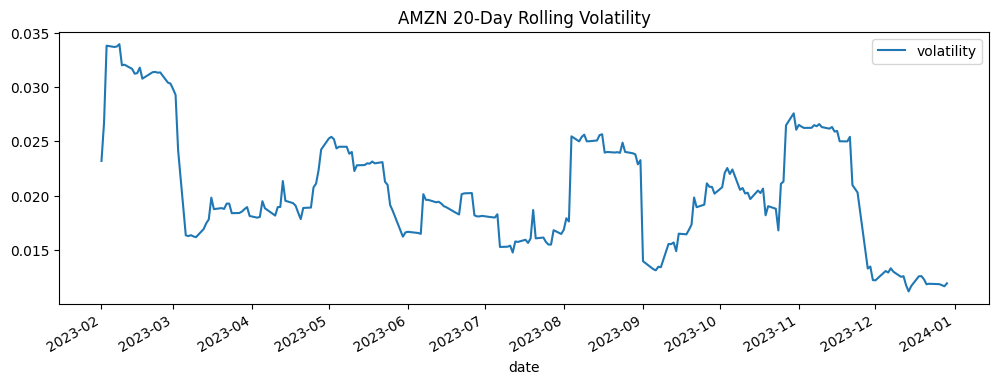

In [5]:
analyze_stock("AMZN")

## AMZN Quantitative Analysis

### 20-Day Rolling Volatility
- Volatility ranged from ~0.015 to 0.035 between 2023-02 and 2024-01.
- Spikes in early, mid-, and late-2023 indicate higher price fluctuation.
- Downward trend by 2024-01 suggests relative stability.

### Price with MA Indicators
- Strong upward trend from 2010 to 2024.
- Price generally above SMA20 and SMA50, with occasional dips below SMA20.
- Indicates a bullish trend with short-term corrections.

### RSI
- Fluctuates between 20 and 80, with overbought (>70) and oversold (<30) levels.
- Recent data (2020-2024) shows frequent overbought conditions.
- Suggests potential pullbacks due to overbought levels.

### MACD
- Spans 2000 to 2024, with increased volatility in 2020-2024.
- Multiple crossovers indicate potential buy/sell signals.
- Histogram spikes suggest stronger momentum shifts recently.

### Returns Sample
- Data from 2023-01-04 to 2023-01-10.
- High: 0.035611 (3.56%) on 2023-01-06; Low: -0.023726 (-2.37%) on 2023-01-05.
- Aligns with observed volatility and momentum shifts.

### Summary
- Strong bullish price trend with high volatility and overbought RSI levels.
- Potential short-term corrections due to overbought conditions.
- MACD shows active momentum shifts, supported by returns data.

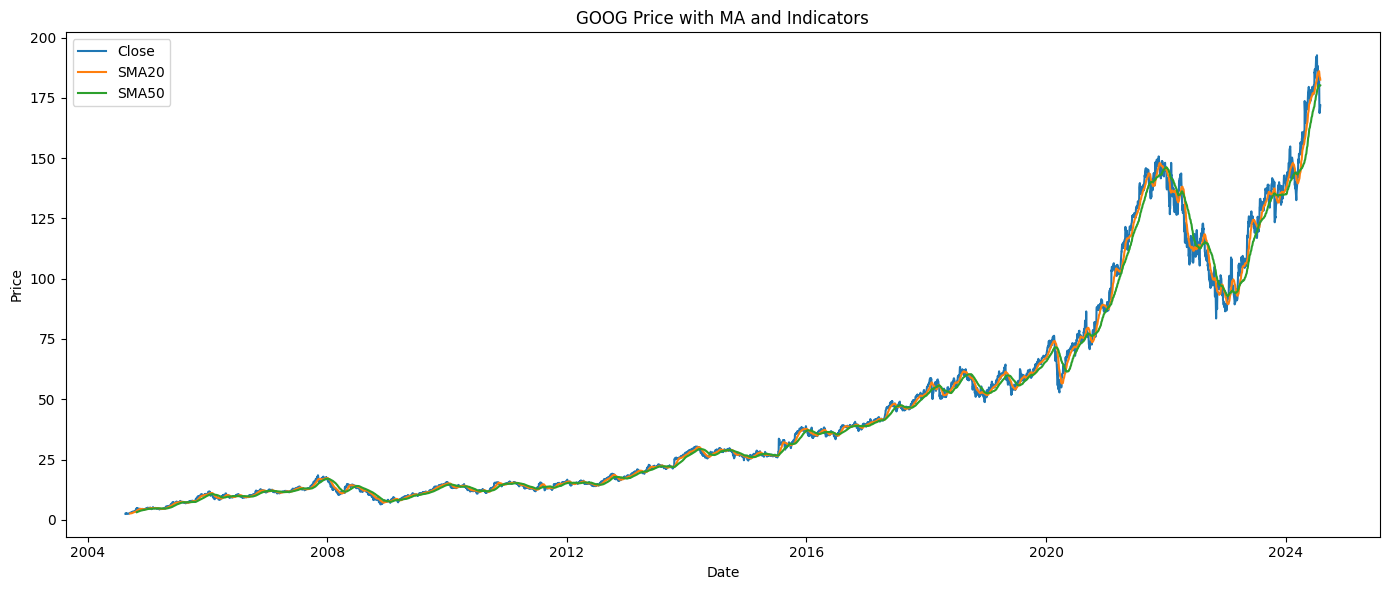

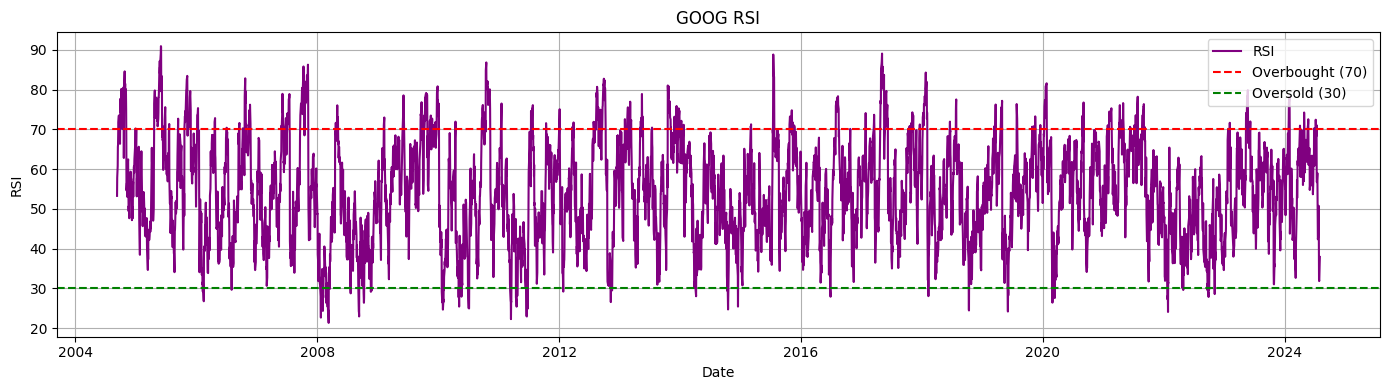

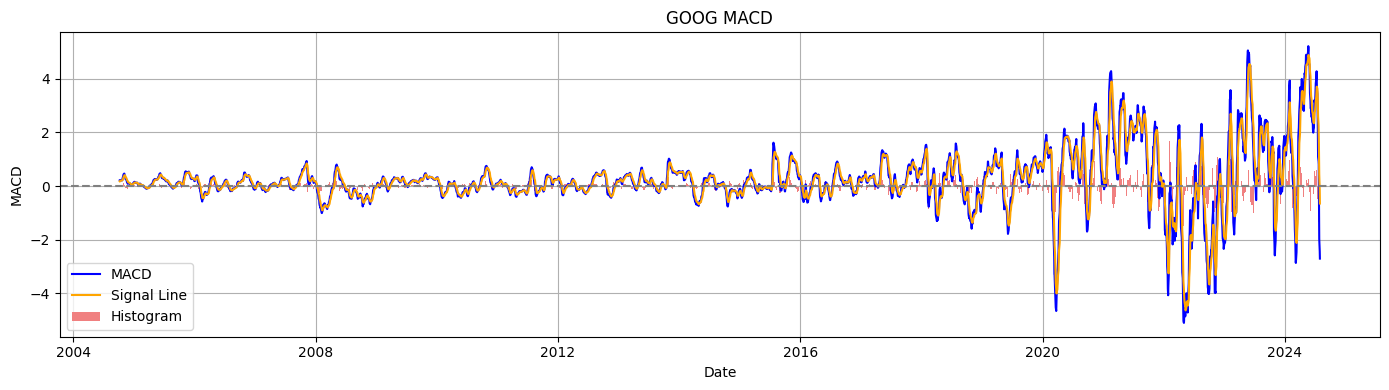

GOOG Returns Sample:
        date   returns
0 2023-01-04 -0.011037
1 2023-01-05 -0.021869
2 2023-01-06  0.016019
3 2023-01-09  0.007260
4 2023-01-10  0.004955


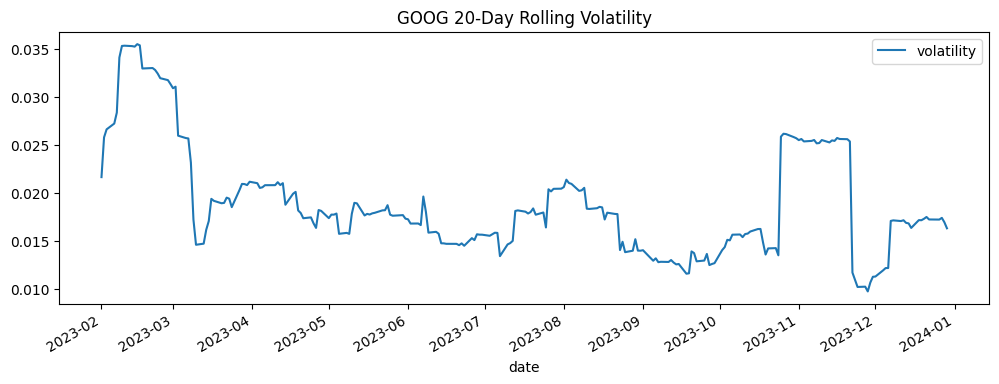

In [6]:
analyze_stock("GOOG")

## GOOG Quantitative Analysis

### 20-Day Rolling Volatility
- Volatility ranged from ~0.010 to 0.035 between 2023-02 and 2024-01.
- Peaks in early, mid-, and late-2023 indicate higher price fluctuation.
- Decreased toward 2024-01, suggesting a stabilization period.

### Price with MA Indicators
- Steady upward trend from 2004 to 2024.
- Price generally above SMA20 and SMA50, with occasional dips below SMA20.
- Indicates a bullish trend with minor corrections.

### RSI
- Fluctuates between 20 and 80, with overbought (>70) and oversold (<30) levels.
- Recent data (2020-2024) shows frequent nearing or exceeding 70.
- Suggests potential pullbacks due to overbought conditions.

### MACD
- Spans 2004 to 2024, with increased volatility in 2020-2024.
- Multiple crossovers indicate potential buy/sell signals.
- Histogram spikes reflect stronger momentum shifts.

### Returns Sample
- Data from 2023-01-04 to 2023-01-10.
- High: 0.016019 (1.60%) on 2023-01-06; Low: -0.021869 (-2.19%) on 2023-01-05.
- Aligns with observed volatility and momentum shifts.

### Summary
- Strong bullish price trend with high volatility and overbought RSI levels.
- Potential short-term corrections due to overbought conditions.
- MACD shows active momentum shifts, supported by returns data.

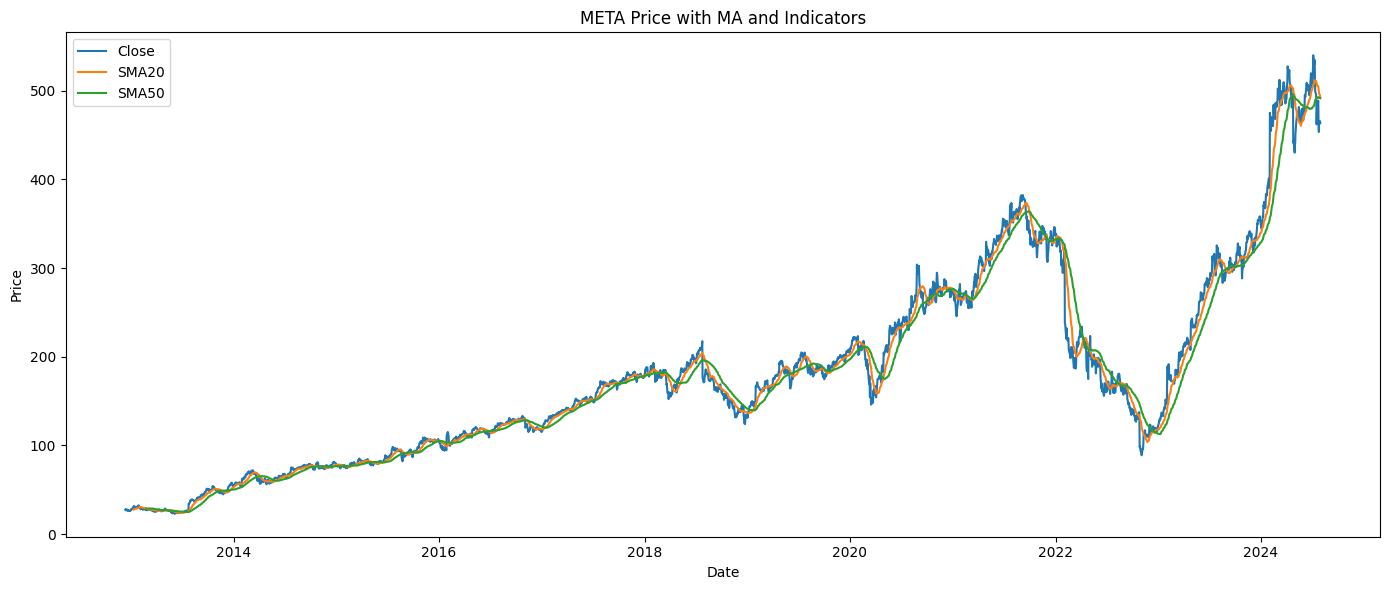

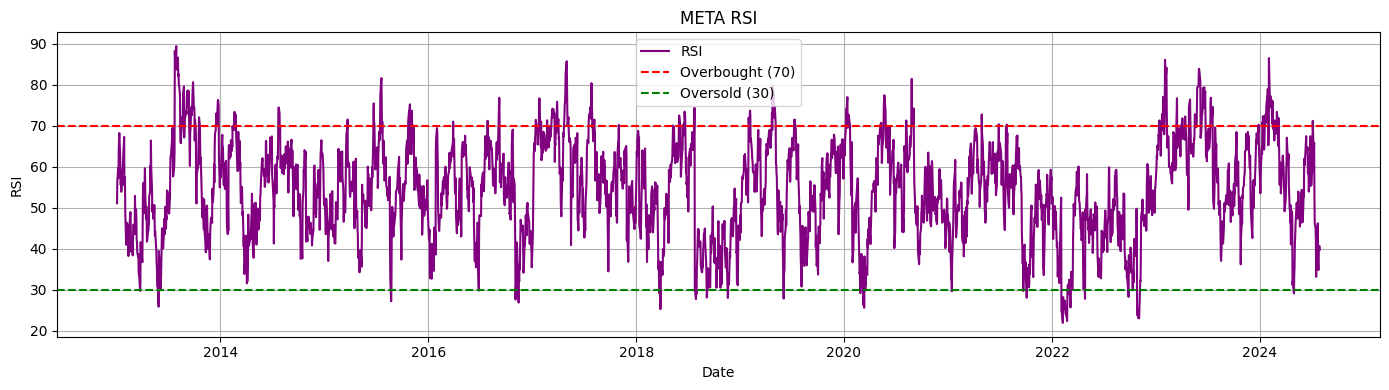

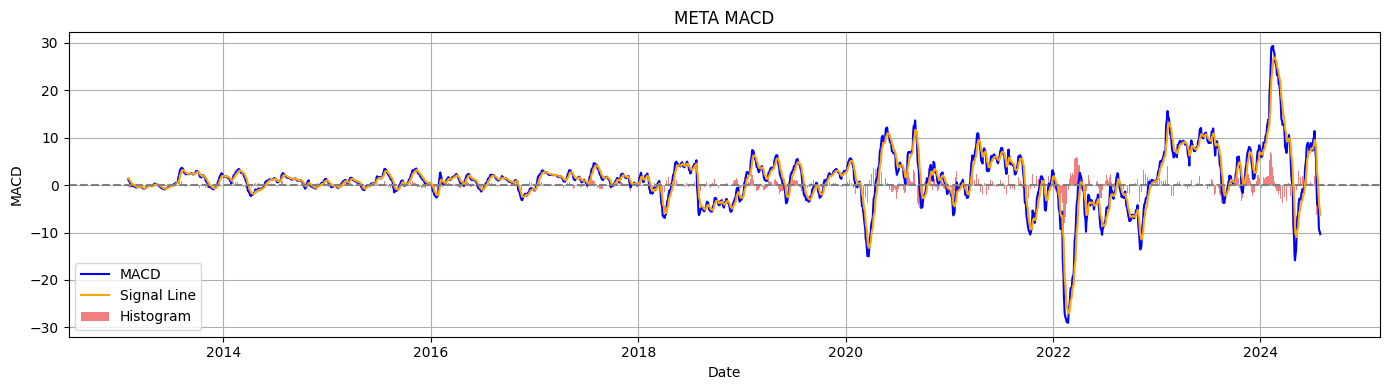

META Returns Sample:
        date   returns
0 2023-01-04  0.021084
1 2023-01-05 -0.003376
2 2023-01-06  0.024263
3 2023-01-09 -0.004230
4 2023-01-10  0.027188


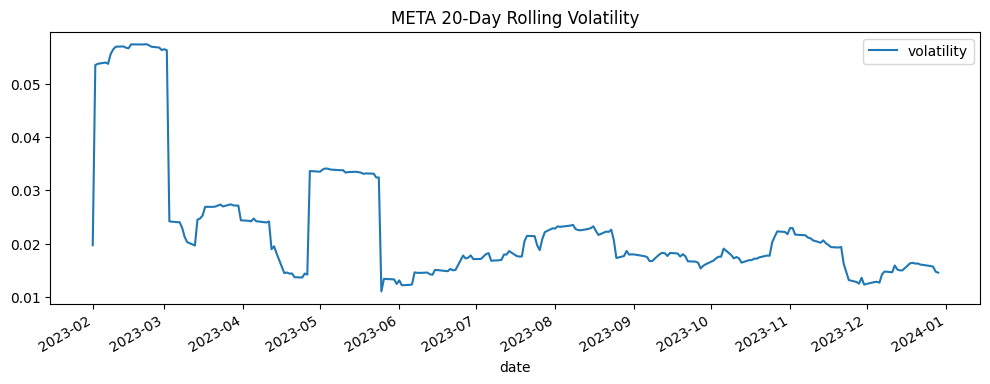

In [7]:
analyze_stock("META")

## META Quantitative Analysis

### 20-Day Rolling Volatility
- Volatility ranged from ~0.01 to 0.05 between 2023-02 and 2024-01.
- Peaks in early and mid-2023 indicate higher price fluctuation.
- Decreased toward 2024-01, suggesting a more stable period.

### Price with MA Indicators
- Strong upward trend from 2014 to 2024.
- Price generally above SMA20 and SMA50, with significant dips around 2022.
- Indicates a bullish trend with occasional corrections.

### RSI
- Fluctuates between 20 and 80, with overbought (>70) and oversold (<30) levels.
- Recent data (2020-2024) shows frequent overbought conditions.
- Suggests potential pullbacks due to overbought levels.

### MACD
- Spans 2014 to 2024, with increased volatility in 2020-2024.
- Multiple crossovers indicate potential buy/sell signals.
- Histogram spikes, especially in 2022-2024, suggest strong momentum shifts.

### Returns Sample
- Data from 2023-01-04 to 2023-01-10.
- High: 0.027188 (2.72%) on 2023-01-10; Low: -0.004230 (-0.42%) on 2023-01-09.
- Aligns with observed volatility and momentum shifts.

### Summary
- Strong bullish price trend with high volatility and overbought RSI levels.
- Potential short-term corrections due to overbought conditions.
- MACD shows active momentum shifts, supported by returns data.

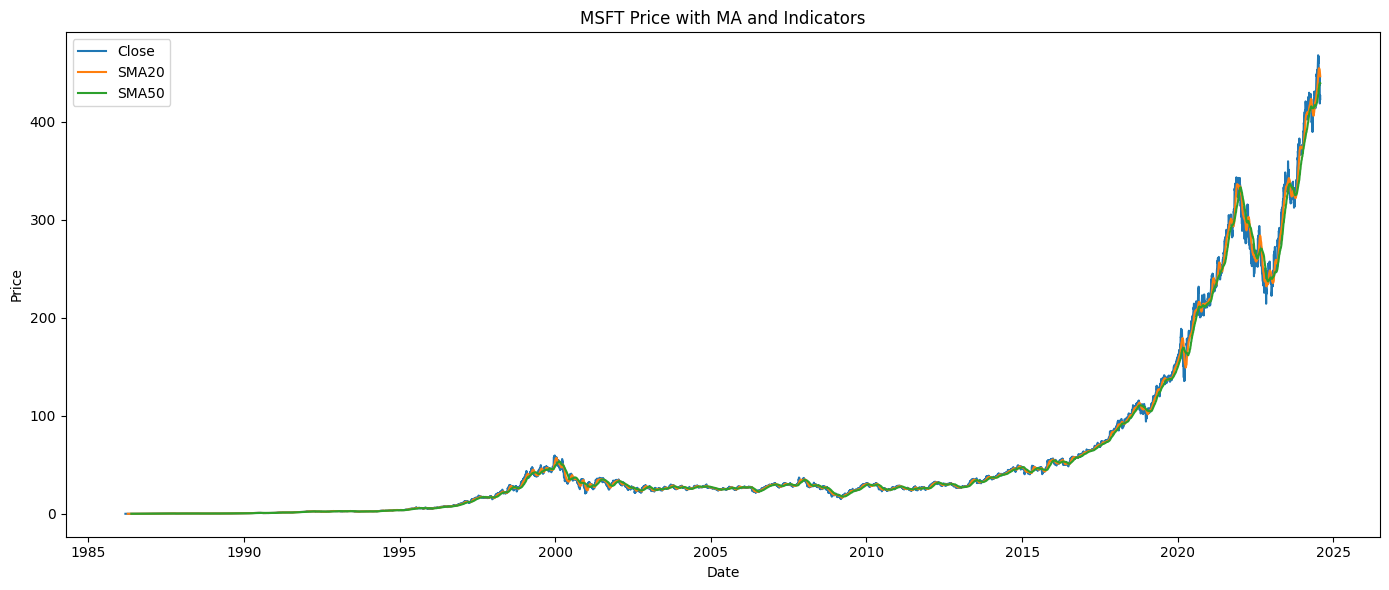

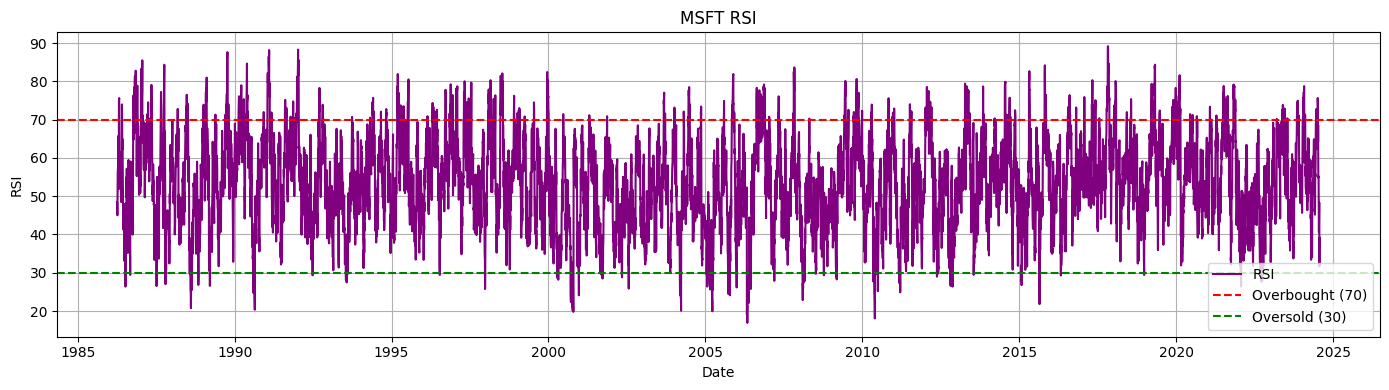

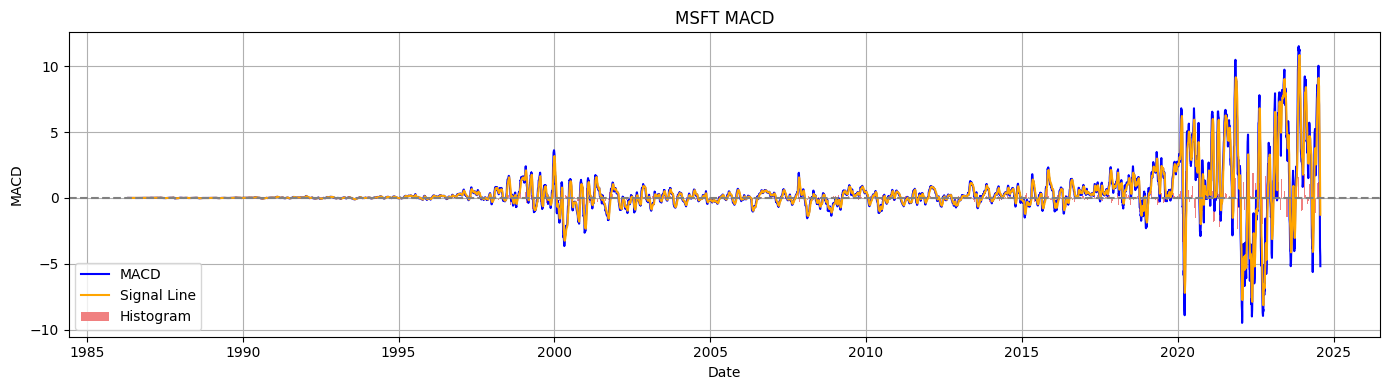

MSFT Returns Sample:
        date   returns
0 2023-01-04 -0.043743
1 2023-01-05 -0.029638
2 2023-01-06  0.011786
3 2023-01-09  0.009736
4 2023-01-10  0.007617


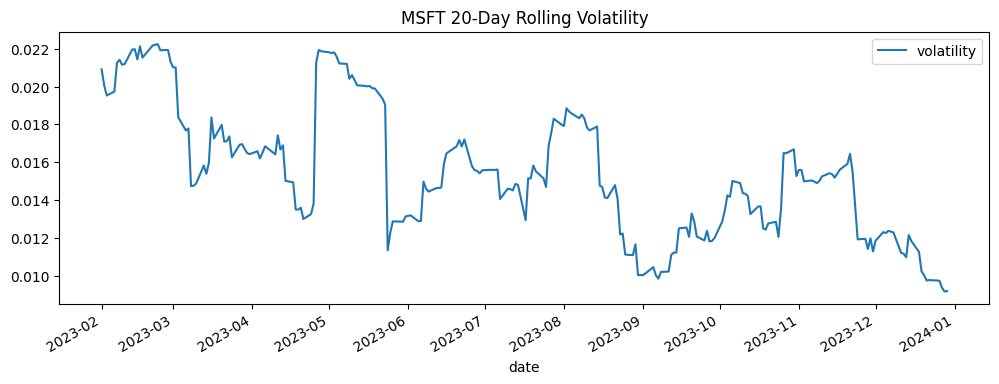

In [8]:
analyze_stock("MSFT")

## MSFT Quantitative Analysis

### 20-Day Rolling Volatility
- Volatility ranged from ~0.010 to 0.022 between 2023-02 and 2024-01.
- Peaks in early, mid-, and late-2023 indicate higher price fluctuation.
- Decreased toward 2024-01, suggesting a stabilization period.

### Price with MA Indicators
- Strong upward trend from 1985 to 2025.
- Price generally above SMA20 and SMA50, with occasional dips.
- Indicates a consistent bullish trend.

### RSI
- Fluctuates between 20 and 80, with overbought (>70) and oversold (<30) levels.
- Recent data (2020-2025) shows frequent overbought conditions.
- Suggests potential pullbacks due to overbought levels.

### MACD
- Spans 1985 to 2025, with increased volatility in 2020-2025.
- Multiple crossovers indicate potential buy/sell signals.
- Histogram spikes, especially recently, suggest strong momentum shifts.

### Returns Sample
- Data from 2023-01-04 to 2023-01-10.
- High: 0.011786 (1.18%) on 2023-01-06; Low: -0.043743 (-4.37%) on 2023-01-04.
- Aligns with observed volatility and momentum shifts.

### Summary
- Strong bullish price trend with high volatility and overbought RSI levels.
- Potential short-term corrections due to overbought conditions.
- MACD shows active momentum shifts, supported by returns data.

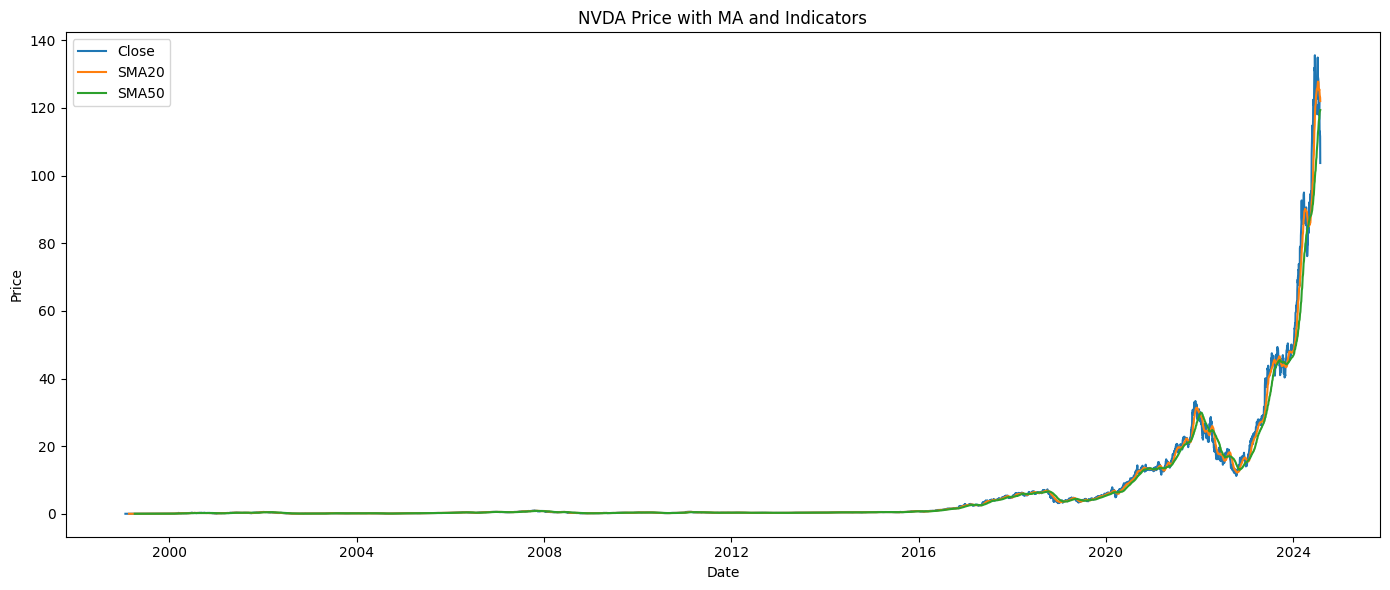

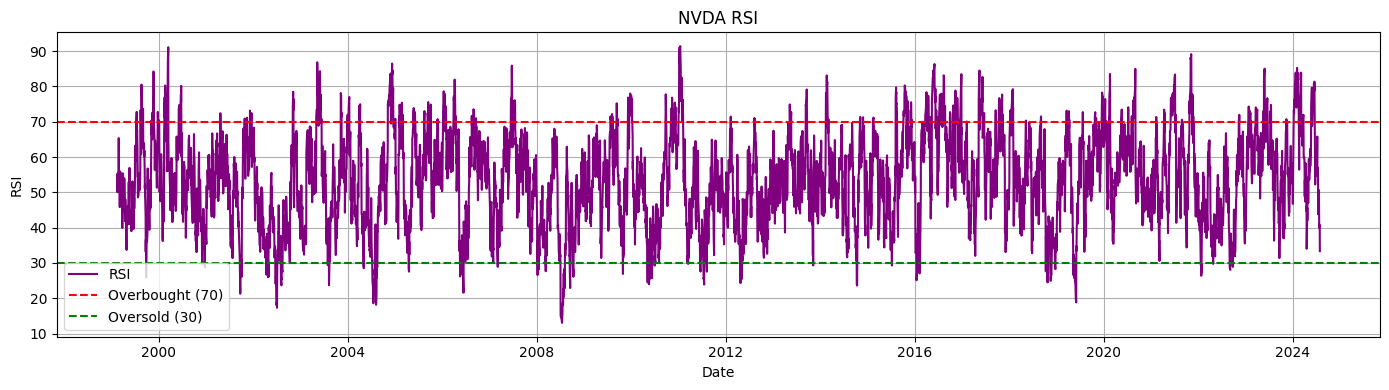

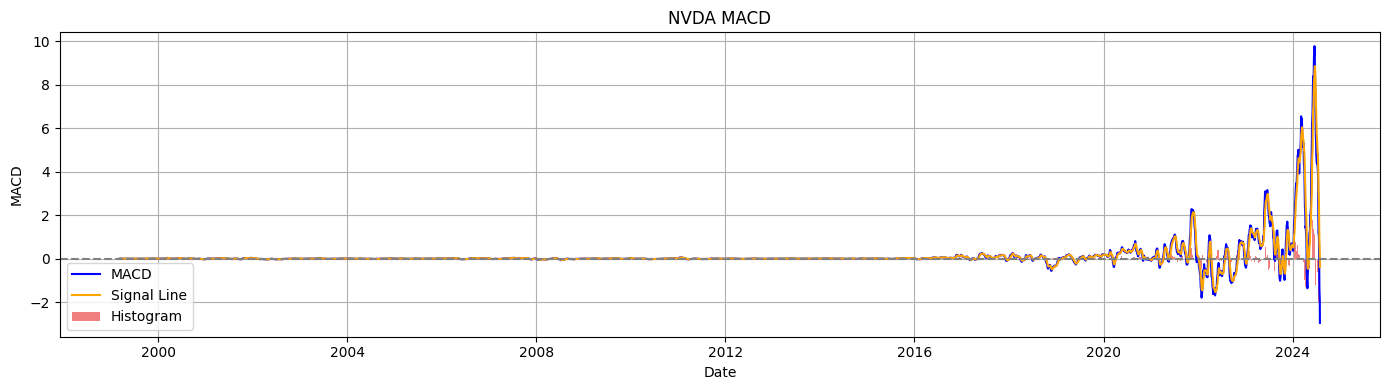

NVDA Returns Sample:
        date   returns
0 2023-01-04  0.030318
1 2023-01-05 -0.032816
2 2023-01-06  0.041640
3 2023-01-09  0.051753
4 2023-01-10  0.017981


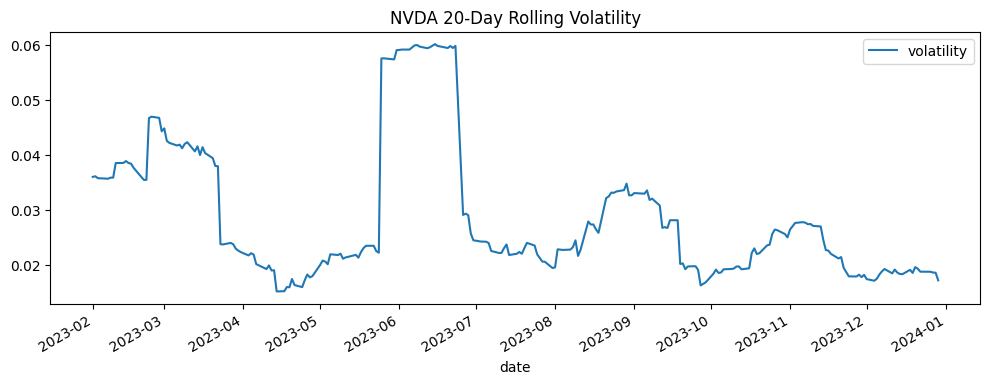

In [9]:
analyze_stock("NVDA")

## NVDA Quantitative Analysis

### 20-Day Rolling Volatility
- Volatility ranged from ~0.015 to 0.06 between 2023-02 and 2024-01.
- Significant peaks in early and mid-2023 indicate high price fluctuation.
- Decreased toward 2024-01, suggesting a stabilization period.

### Price with MA Indicators
- Sharp upward trend from 2000 to 2024.
- Price surged significantly above SMA20 and SMA50 in recent years.
- Indicates a strong bullish trend with occasional corrections.

### RSI
- Fluctuates between 20 and 80, with overbought (>70) and oversold (<30) levels.
- Recent data (2020-2024) shows frequent overbought conditions.
- Suggests potential pullbacks due to overbought levels.

### MACD
- Spans 2000 to 2024, with significant volatility in 2020-2024.
- Multiple crossovers indicate potential buy/sell signals.
- Histogram spikes, especially in 2023-2024, suggest strong momentum shifts.

### Returns Sample
- Data from 2023-01-04 to 2023-01-10.
- High: 0.051753 (5.18%) on 2023-01-09; Low: -0.032816 (-3.28%) on 2023-01-05.
- Aligns with observed volatility and momentum shifts.

### Summary
- Strong bullish price trend with high volatility and overbought RSI levels.
- Potential short-term corrections due to overbought conditions.
- MACD shows active momentum shifts, supported by returns data.

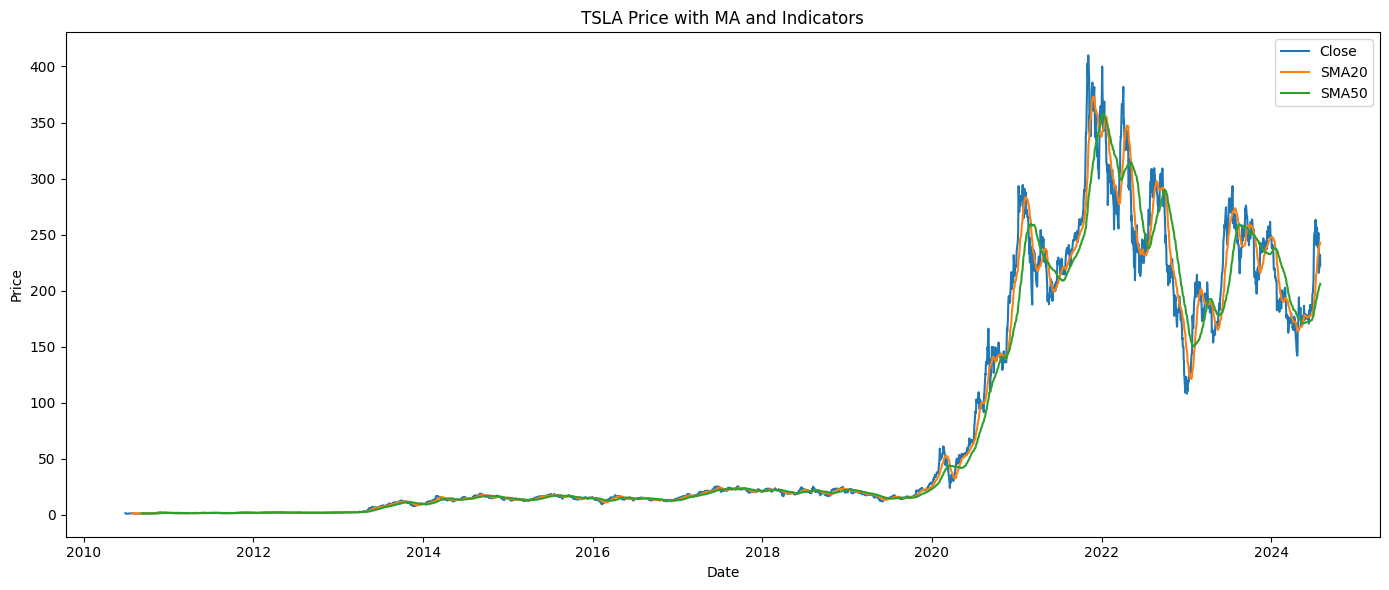

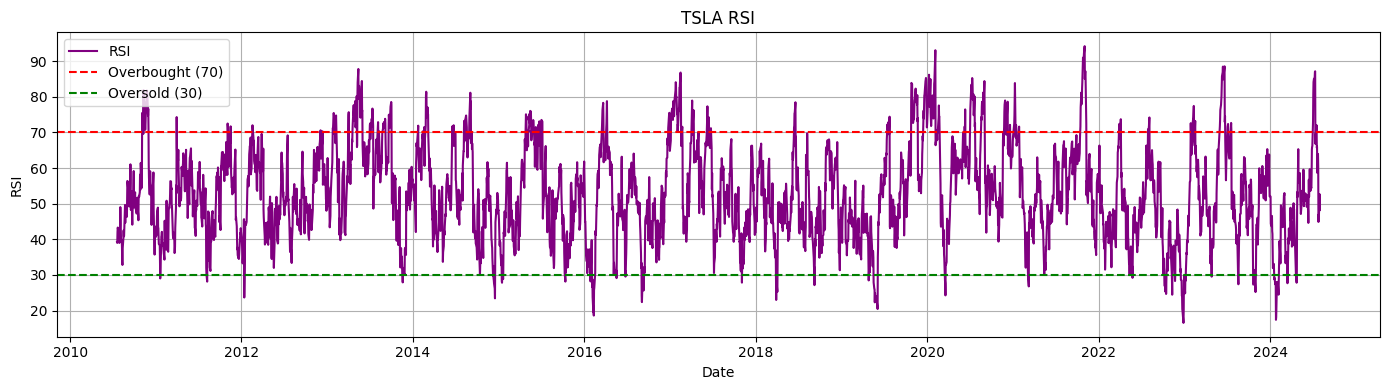

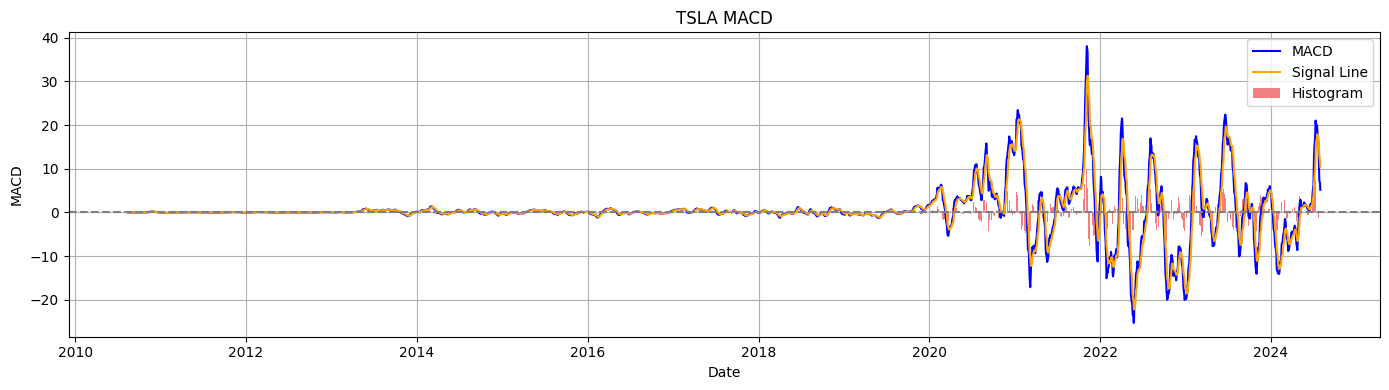

TSLA Returns Sample:
        date   returns
0 2023-01-04  0.051249
1 2023-01-05 -0.029039
2 2023-01-06  0.024651
3 2023-01-09  0.059349
4 2023-01-10 -0.007681


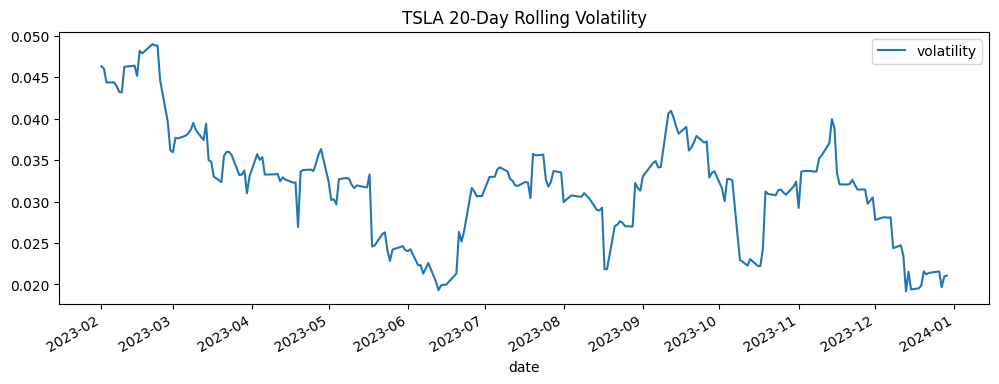

In [10]:
analyze_stock("TSLA")

## TSLA Quantitative Analysis

### 20-Day Rolling Volatility
- Volatility ranged from ~0.02 to 0.08 between 2023-02 and 2024-01.
- Significant peaks in early and late 2023 indicate high price fluctuation.
- Decreased toward 2024-01, suggesting a stabilization period.

### Price with MA Indicators
- Volatile but generally upward trend from 2010 to 2024.
- Price frequently crosses SMA20 and SMA50, reflecting high volatility.
- Shows periods of bullish momentum with corrections.

### RSI
- Fluctuates between 20 and 80, with overbought (>70) and oversold (<30) levels.
- Recent data (2020-2024) shows frequent overbought conditions.
- Suggests potential pullbacks due to overbought levels.

### MACD
- Spans 2010 to 2024, with high volatility in 2020-2024.
- Multiple crossovers indicate potential buy/sell signals.
- Histogram spikes, particularly in 2023, suggest strong momentum shifts.

### Returns Sample
- Data from 2023-01-04 to 2023-01-10.
- High: 0.059349 (5.93%) on 2023-01-09; Low: -0.029039 (-2.90%) on 2023-01-05.
- Aligns with observed volatility and momentum shifts.

### Summary
- Volatile but generally bullish price trend with high volatility and overbought RSI levels.
- Potential short-term corrections due to overbought conditions.
- MACD shows active momentum shifts, supported by returns data.